Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler


Load Dataset

In [2]:
df = pd.read_csv("world-happiness-report.csv")
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Pilih Fitur Untuk Clustering

In [3]:
features = df[['Economy (GDP per Capita)', 
               'Health (Life Expectancy)', 
               'Happiness Score']]

labels = df['Country']


Standarisasi Data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


Hierarchical Clustering

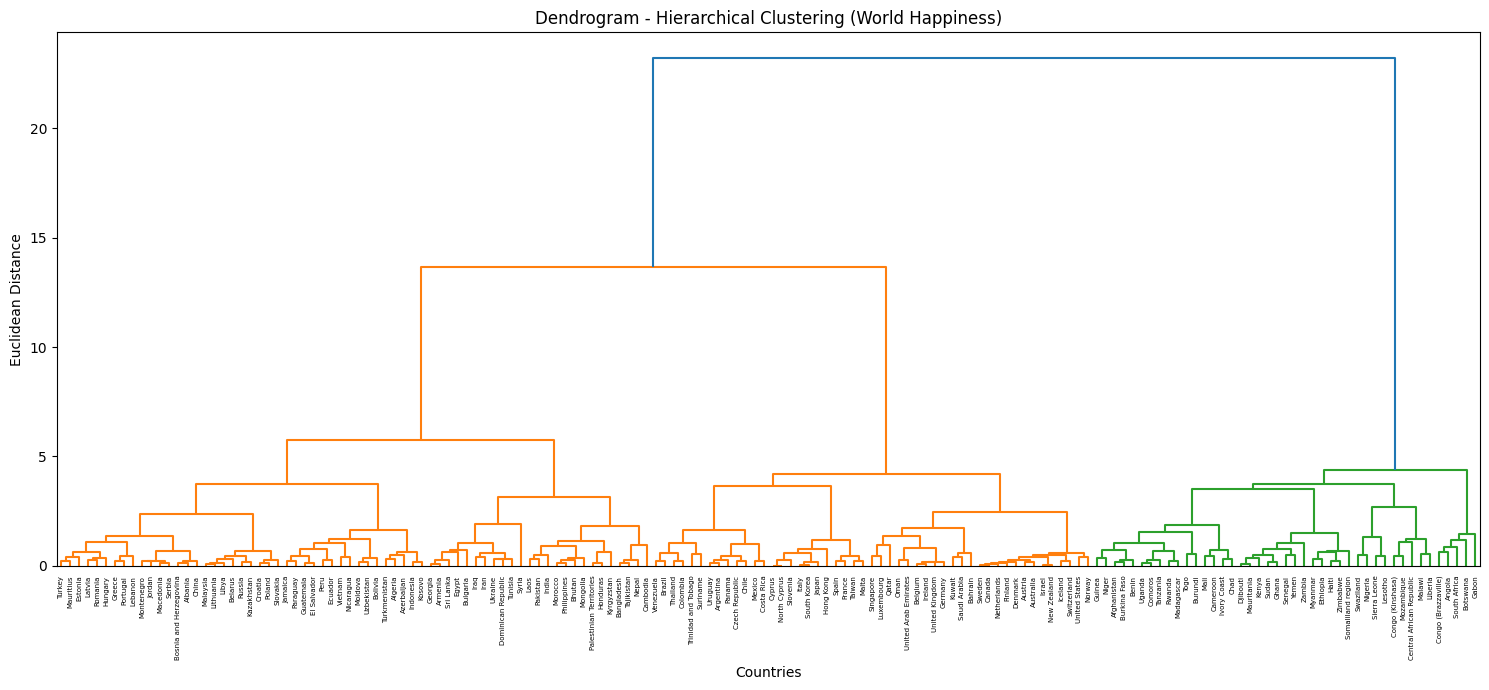

In [5]:
linked = linkage(X_scaled, method='ward')  # Bisa juga: 'complete', 'average', 'single'

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
           labels=labels.values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrogram - Hierarchical Clustering (World Happiness)")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Potong Dendrogram (Tentukan Jumlah Cluster)

In [6]:
from scipy.cluster.hierarchy import fcluster

max_clusters = 3
clusters = fcluster(linked, max_clusters, criterion='maxclust')

# Tambahkan ke DataFrame
features['Cluster'] = clusters
features['Country'] = labels.values
features.head()


C:\Users\Ravicenna\AppData\Local\Temp\ipykernel_1496\33132968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = clusters
C:\Users\Ravicenna\AppData\Local\Temp\ipykernel_1496\33132968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Country'] = labels.values


,Economy (GDP per Capita),Health (Life Expectancy),Happiness Score,Cluster,Country
0,1.39651,0.94143,7.587,2,Switzerland
1,1.30232,0.94784,7.561,2,Iceland
2,1.32548,0.87464,7.527,2,Denmark
3,1.45900,0.88521,7.522,2,Norway
4,1.32629,0.90563,7.427,2,Canada


Visualisasi Cluster

In [7]:
print(features.columns)
print(features[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Cluster']].dtypes)
print(features[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Cluster']].isnull().sum())


Index(['Economy (GDP per Capita)', 'Health (Life Expectancy)',
       'Happiness Score', 'Cluster', 'Country'],
      dtype='object')
Economy (GDP per Capita)    float64
Health (Life Expectancy)    float64
Cluster                       int32
dtype: object
Economy (GDP per Capita)    0
Health (Life Expectancy)    0
Cluster                     0
dtype: int64


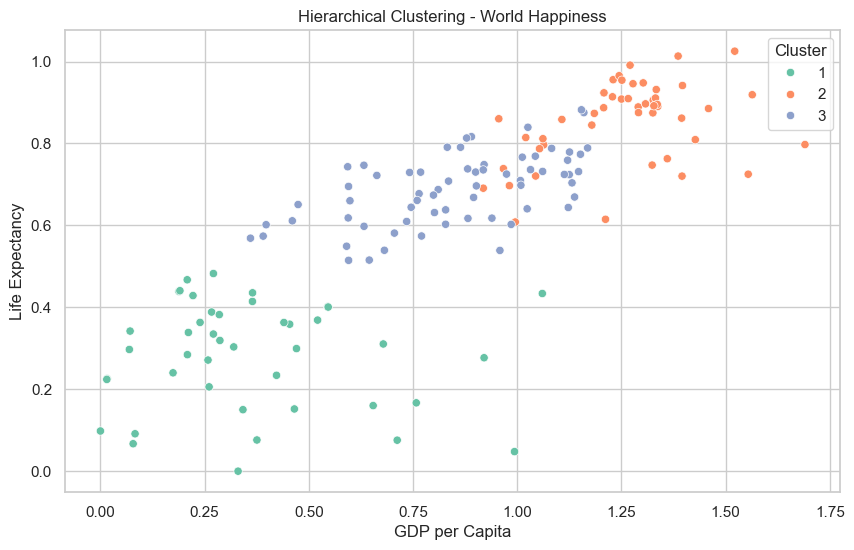

In [8]:
# Drop baris yang mengandung NaN (jika ada)
plot_df = features[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Cluster']].dropna()

# Pastikan kolom numerik
plot_df['Economy (GDP per Capita)'] = pd.to_numeric(plot_df['Economy (GDP per Capita)'], errors='coerce')
plot_df['Health (Life Expectancy)'] = pd.to_numeric(plot_df['Health (Life Expectancy)'], errors='coerce')
plot_df['Cluster'] = pd.to_numeric(plot_df['Cluster'], errors='coerce')

# Plot ulang
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df,
                x='Economy (GDP per Capita)',
                y='Health (Life Expectancy)',
                hue='Cluster',
                palette='Set2')
plt.title("Hierarchical Clustering - World Happiness")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.show()

